#  XGBOOST CLASIFICATION



We present and import all the libraries that we are going to need throughout the model.

In [3]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier

We read and present our Database. We show the first 5 rows, the type and name of the Columns / variables that compose it. The variables that refer to business units are not going to be used in the model so we transform them to Object for a better understanding and segmentation of the variables themselves.

In [4]:
df = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [5]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,TUTELA,28332.0,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475.0,ASESORAMIENTO FINANCIERO,14204.0,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000.0,ASESORAMIENTO FINANCIERO,14219.0,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [6]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## First aproach to the model

In [7]:
df = df.select_dtypes('number')

In [10]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 8576106 (451374, 19)
Datos y = 451374 (451374,)


In [21]:
# Instantiate the classifier
clfXGBoost_first_aproach = XGBClassifier()

In [22]:
# We train the model
clfXGBoost_first_aproach.fit(X,y)

[15:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
# We draw the first predictions
clfXGBoost_first_aproach.predict(X)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
# We divide our DF into Training Set 80% and Test Set 20%.  
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [24]:
# We train the model
clfXGBoost_first_aproach.fit(X_train,y_train)

[15:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
# Get probabilities on 1 "Have Home Insurance".
clfXGBoost.predict_proba(X_test)[:, 1]

array([0.00734196, 0.41358268, 0.43320242, ..., 0.08270034, 0.5148063 ,
       0.07456124], dtype=float32)

In [27]:
print('== First aproach XGBOOST_model ==')
print ('accuracy_score = ', accuracy_score(y_test,clfXGBoost_first_aproach.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfXGBoost_first_aproach.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfXGBoost_first_aproach.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfXGBoost_first_aproach.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfXGBoost_first_aproach.predict_proba(X_test)[:, 1]))
print('====================================')


== First aproach XGBOOST_model ==
accuracy_score =  0.8747050678482415
precision = 0.5657602663706992
recall = 0.17301654645736106
f1_score = 0.26499447657417635
roc_auc_score = 0.8423034035558632


Without training: ROC AUC=0.500
XGBOOST: ROC AUC=0.842


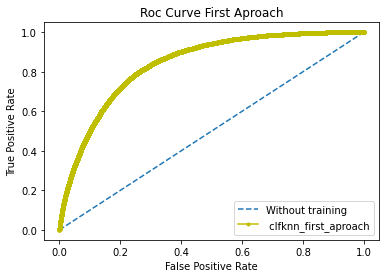

In [30]:
# We paint Roc Curve
# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# We calculate the AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfXGBoost_first_aproach.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('XGBOOST: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfXGBoost_first_aproach.predict_proba(X_test)[:, 1])
# We paint the ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfknn_first_aproach' , color = "y")
# Axes labels
pyplot.title('Roc Curve First Aproach')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/XGBOOST Model - Roc Curve First Aproach.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## Building the Model

In [31]:
# Read Data Frame 
df_normalized = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalized.csv')

In [32]:
# Inputs y Target 
X = df_normalized.drop(['lp_seg_hogar'], axis = 1)
y= df_normalized['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6684992 (417812, 16)
Datos y = 417812 (417812,)


In [40]:
# Instantiate the classifier
clfXGBoost = XGBClassifier()

In [41]:
# We adjust our training and test set. (80-20)
test_size = 0.2
seed = 47
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [42]:
# Train the model
X_train.shape,X_train.shape

((334249, 16), (334249, 16))

In [43]:
# Train the model
clfXGBoost.fit(X_train, y_train)

[15:53:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
# Predictions
clfXGBoost.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
# Probabiliteis for option 1 "Has Home Insurance" 
clfXGBoost.predict_proba(X_test)[:, 1]

array([0.07424898, 0.16164492, 0.00200887, ..., 0.01031027, 0.00168153,
       0.01335691], dtype=float32)

__First results__. We take as a sample the recall metric. The results obtained in Train are very close to those obtained in test. Our trained model is generalizing well and we can consider it as good for the time being, pending better metrics. In case there was a big difference it could be indicating overfitting. We confirm that it generalizes well with Cross Validation


In [46]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfXGBoost.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))

===========RECALL TRAIN============
recall = 0.3694670873871505
===========RECALL TEST=============
recall = 0.34970341939986044


## Cross validation techniques.  Metrics: Cross validation
We use Cross Validation iteratting 5 times throughout the training set.

- We will set aside 1/5 samples.
- We train the model with the remaining 4/5 samples.
- We will measure with different metrics the result obtained on the set aside samples.
- This means that we do 5 independent trainings.
- The results will be the average of the 5 previous metrics.

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfXGBoost,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfXGBoost,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfXGBoost,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(0.7101162982151441, 0.3456042031523643, 0.4643222243640205)

[[70516  1583]
 [ 7455  4009]]


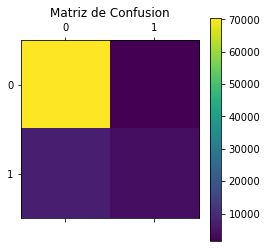

In [48]:
matriz_confusion_clfXGBoost = confusion_matrix(y_test,clfXGBoost.predict(X_test))
print(matriz_confusion_clfXGBoost)
pl.matshow(confusion_matrix(y_test,clfXGBoost.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [49]:
print('========= clfXGBoost================')
print ('accuracy_score = ', accuracy_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfXGBoost.predict_proba(X_test)[:, 1]))
print('====================================')


========= clfXGBoost================
accuracy_score =  0.8918420832186494
precision = 0.7169170243204578
recall = 0.34970341939986044
f1_score = 0.4700984990619137
roc_auc_score = 0.8929102371519149


## GridSearchCV  


In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
XGBClassifier() 

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [52]:
#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
XGBoost_params = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

XGBoostgs = GridSearchCV(
        clfXGBoost,
        XGBoost_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )


In [53]:
XGBoostgs.fit(X_train,y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 54.2min finished
C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:52:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [54]:
XGBoostgs.best_score_

0.8910811991809927

In [55]:
XGBoostgs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
XGBoostgs.best_params_

{'colsample_bytree': 0.8,
 'gamma': 2,
 'max_depth': 5,
 'min_child_weight': 10,
 'subsample': 1.0}

## Hacemos el modelo con los mejores parametros

In [57]:
clfXGBoost = XGBClassifier(colsample_bytree = 1.0,
 gamma = 2,
 max_depth = 5,
 min_child_weight = 1,
 subsample= 0.8)

In [58]:
clfXGBoost.fit(X_train, y_train)

[16:53:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
clfXGBoost.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
clfXGBoost.predict_proba(X_test)[:, 1]

array([0.08147623, 0.1447347 , 0.0025267 , ..., 0.01065258, 0.00146256,
       0.01288174], dtype=float32)

In [61]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfXGBoost.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))

===========RECALL TRAIN============
recall = 0.3541283197475677
===========RECALL TEST=============
recall = 0.3413293789253315


## Metrics: Cross validation

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfXGBoost,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfXGBoost,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfXGBoost,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:53:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:53:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:57:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(0.7119580481296679, 0.33591943957968484, 0.45598245624820677)

[[70557  1542]
 [ 7551  3913]]


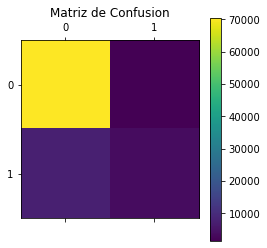

In [63]:
matriz_confusion_clfXGBoost = confusion_matrix(y_test,clfXGBoost.predict(X_test))
print(matriz_confusion_clfXGBoost)
pl.matshow(confusion_matrix(y_test,clfXGBoost.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [64]:
print('========= clfXGBoost================')
print ('accuracy_score = ', accuracy_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfXGBoost.predict_proba(X_test)[:, 1]))
print('====================================')
#print('classification_report')
#print(classification_report(y_test, clfknn.predict(X_test)))3c445ddeb657

========= clfXGBoost================
accuracy_score =  0.8911838971793736
precision = 0.7173235563703024
recall = 0.3413293789253315
f1_score = 0.4625568887050062
roc_auc_score = 0.8923245156135482


## Curva Roc

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.892


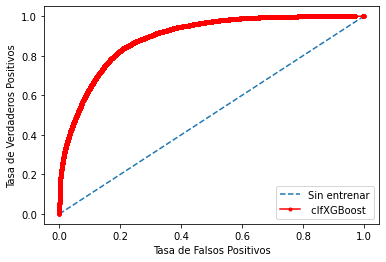

In [65]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clfXGBoost.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfXGBoost.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfXGBoost' , color = "r")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

## *** Conclusiones Modelo ***

- __La metrica elegida__ en el Modelo de clasificacion XGBoost para decidir si estamos ante un buen resultado es __Metrica Recall y AUC - Curva Roc.__ 
- Iniciamos nuestro modelo con una __primera aproximacion__ obteniendo unos resultados __muy mejorables. Recall 0,17.__ La base de datos utilizada es la original sin haber realizado ningun preprocesado. 
- Continuamos evolucionando nuestro modelo. Utilizamos la base de datos normalizada sin PCA.  Bases de datos  preprocesada en nuestro bloque de preprocessing donde hemos adaptado, aplicado Label Encoder, Standar Scalery  Normalizado variables.  
- __Confirmamos que nuestro set de entramiento ha generalizado bien al no haber mucha diferencia entre los resultados obtenidos de Test y Train. Test 0.39 Train 0.37 . Podemos descartar overfiting__ Comprobamos mediante Cross Validation obteniendo medias de distintas metricas.

- Necesitamos mejorar el modelo y para ello utilizamos GridSearch para buscar soluciones y mejores parametros. Una vez obtenidos, entrenamos de nuevo y sacamos nuevamente metricas Recall 0.35 Train - 0.34 
- __Las metricas finales son :  Recall 0.34 - Auc 0.89__
- Dadas las metricas obtenidas consideramos que no es el mejor modelo para nuestro objetivo.
